<a href="https://colab.research.google.com/github/uervitonsantos/projeto_rstudio_valor-combustive_por_estado/blob/main/projeto_rstudio_valor_combustive_por_estado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

###Carregando os pacotes

In [ ]:
%%R
system('sudo apt install libcairo2-dev')
install.packages("devtools")  # if not already installed
library(devtools)
install_git("https://github.com/ccolonescu/PoEdata")
install.packages('hrbrthemes')
install.packages("tidyverse")
install.packages("janitor")
install.packages("gridExtra")
library(gridExtra)
library(janitor)
library(dplyr)
library(tidyverse)
library (janitor)
library(ggplot2)
library(hrbrthemes)

##Carregando os dados do DataSet

In [114]:
%%R
car <- read.csv("/content/drive/MyDrive/Colab Notebooks/DateSet/ca-2021-02-1.csv", header = TRUE, sep = ";", dec = ",")
head(car)


  Regiao...Sigla Estado...Sigla Municipio
1             NE             CE MARACANAU
2             NE             CE MARACANAU
3             NE             CE MARACANAU
4             NE             CE MARACANAU
5             NE             CE MARACANAU
6             NE             CE MARACANAU
                                       Revenda     CNPJ.da.Revenda
1 BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.  05.397.086/0001-51
2 BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.  05.397.086/0001-51
3 BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.  05.397.086/0001-51
4 BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.  05.397.086/0001-51
5                    LUIZA GLAURIA R T MENEZES  03.602.329/0001-10
6                    LUIZA GLAURIA R T MENEZES  03.602.329/0001-10
                             Nome.da.Rua Numero.Rua Complemento
1 RODOVIA MARANGUAPE - FORTALEZA - KM 06        S/N            
2 RODOVIA MARANGUAPE - FORTALEZA - KM 06        S/N            
3 RODOVIA MARANGUAPE - FORTALEZA - KM 06     

###Resumo das variaves do conjunto de dados

In [122]:
%%R
names(car)

 [1] "Regiao...Sigla"    "Estado...Sigla"    "Municipio"        
 [4] "Revenda"           "CNPJ.da.Revenda"   "Nome.da.Rua"      
 [7] "Numero.Rua"        "Complemento"       "Bairro"           
[10] "Cep"               "Produto"           "Data.da.Coleta"   
[13] "Valor.de.Venda"    "Valor.de.Compra"   "Unidade.de.Medida"
[16] "Bandeira"         


###Seleção de colunas

In [123]:
%%R
data_car <- select(car, Produto, Estado...Sigla, Regiao...Sigla, Bandeira, Valor.de.Venda)
head(data_car)

             Produto Estado...Sigla Regiao...Sigla      Bandeira Valor.de.Venda
1 GASOLINA ADITIVADA             CE             NE      IPIRANGA          5.699
2           GASOLINA             CE             NE      IPIRANGA          5.499
3         DIESEL S10             CE             NE      IPIRANGA          4.699
4             ETANOL             CE             NE      IPIRANGA          5.200
5           GASOLINA             CE             NE VIBRA ENERGIA          5.490
6         DIESEL S10             CE             NE VIBRA ENERGIA          4.490


In [124]:
%%R
sao_paulo <- filter(data_car, Estado...Sigla == 'SP' )

##Agrupamento de colunas

In [125]:
%%R
p <- data_car %>% group_by(Produto, Estado...Sigla, Regiao...Sigla, Bandeira) %>%
summarise(Valor.de.Venda)
p

`summarise()` has grouped output by 'Produto', 'Estado...Sigla',
'Regiao...Sigla', 'Bandeira'. You can override using the `.groups` argument.
# A tibble: 472,856 × 5
# Groups:   Produto, Estado...Sigla, Regiao...Sigla, Bandeira [1,155]
   Produto Estado...Sigla Regiao...Sigla Bandeira Valor.de.Venda
   <chr>   <chr>          <chr>          <chr>             <dbl>
 1 DIESEL  AC             N              ATEM' S            6.07
 2 DIESEL  AC             N              ATEM' S            6.02
 3 DIESEL  AC             N              ATEM' S            6.17
 4 DIESEL  AC             N              ATEM' S            6.17
 5 DIESEL  AC             N              ATEM' S            6.17
 6 DIESEL  AC             N              ATEM' S            6.17
 7 DIESEL  AC             N              ATEM' S            6.17
 8 DIESEL  AC             N              ATEM' S            6.17
 9 DIESEL  AC             N              ATEM' S            6.17
10 DIESEL  AC             N              ATEM' S 

###Tabelas de frequencia

In [126]:
%%R 
uf <- table(p$Produto, p$Estado...Sigla) #frequencia absoluta
head(uf)

                    
                        AC    AL    AM    AP    BA    CE    DF    ES    GO
  DIESEL               897   516   760   179  2573   850   502   715  2003
  DIESEL S10           974   962  1063   136  4458  4820   735  1641  3093
  ETANOL               491  1042   904    18  5127  4816  1002  1472  3775
  GASOLINA             993  1110  1413   602  5136  5135  1005  1898  3888
  GASOLINA ADITIVADA   746   843   948    70  4472  4354   859  1708  2067
  GNV                    0   134    22     0   476   423     1   347     0
                    
                        MA    MG    MS    MT    PA    PB    PE    PI    PR
  DIESEL               386  5961  1089  2053  1148   571   379   653  3076
  DIESEL S10          1207  8097  1263  3362  1890  1329  3960  1191  5676
  ETANOL               917 11077  1585  3820   777  1338  4029  1131  7249
  GASOLINA            1277 11109  1576  3841  2118  1436  4233  1377  7182
  GASOLINA ADITIVADA   946  6731  1059  1970  1420   861  

In [127]:
%%R
fr <- 100*prop.table(uf) #frequencia relativa
fr <- round(fr, digits=2)
head(fr)

                    
                       AC   AL   AM   AP   BA   CE   DF   ES   GO   MA   MG
  DIESEL             0.19 0.11 0.16 0.04 0.54 0.18 0.11 0.15 0.42 0.08 1.26
  DIESEL S10         0.21 0.20 0.22 0.03 0.94 1.02 0.16 0.35 0.65 0.26 1.71
  ETANOL             0.10 0.22 0.19 0.00 1.08 1.02 0.21 0.31 0.80 0.19 2.34
  GASOLINA           0.21 0.23 0.30 0.13 1.09 1.09 0.21 0.40 0.82 0.27 2.35
  GASOLINA ADITIVADA 0.16 0.18 0.20 0.01 0.95 0.92 0.18 0.36 0.44 0.20 1.42
  GNV                0.00 0.03 0.00 0.00 0.10 0.09 0.00 0.07 0.00 0.00 0.04
                    
                       MS   MT   PA   PB   PE   PI   PR   RJ   RN   RO   RR
  DIESEL             0.23 0.43 0.24 0.12 0.08 0.14 0.65 0.67 0.19 0.21 0.05
  DIESEL S10         0.27 0.71 0.40 0.28 0.84 0.25 1.20 1.35 0.25 0.23 0.07
  ETANOL             0.34 0.81 0.16 0.28 0.85 0.24 1.53 1.65 0.27 0.12 0.01
  GASOLINA           0.33 0.81 0.45 0.30 0.90 0.29 1.52 1.67 0.26 0.27 0.07
  GASOLINA ADITIVADA 0.22 0.42 0.30 0.18 0.58 

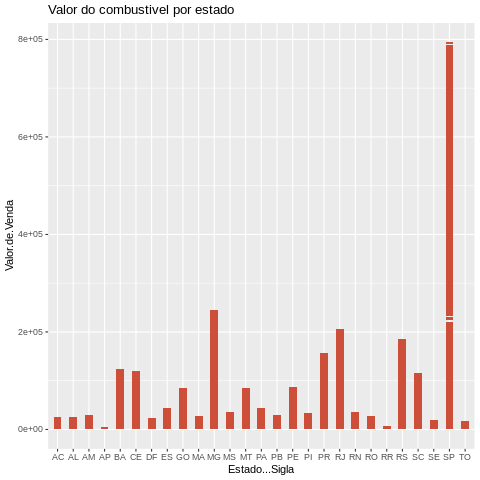

In [128]:
%%R
ggplot(p, aes(x= Estado...Sigla, y = Valor.de.Venda)) + 
geom_bar(stat="identity", width=.5, fill="tomato3") + 
ggtitle("Valor do combustivel por estado")

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



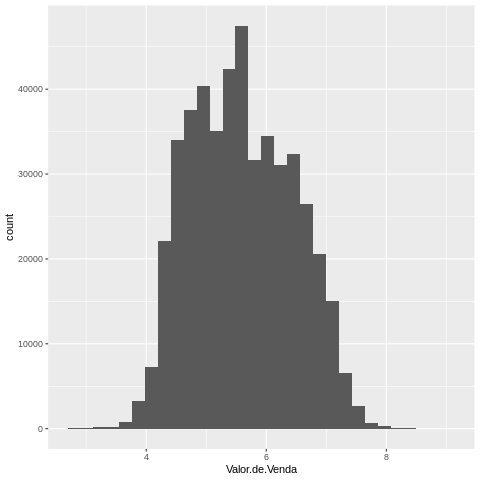

In [129]:
%%R
ggplot(p, aes(Valor.de.Venda)) +
geom_histogram()

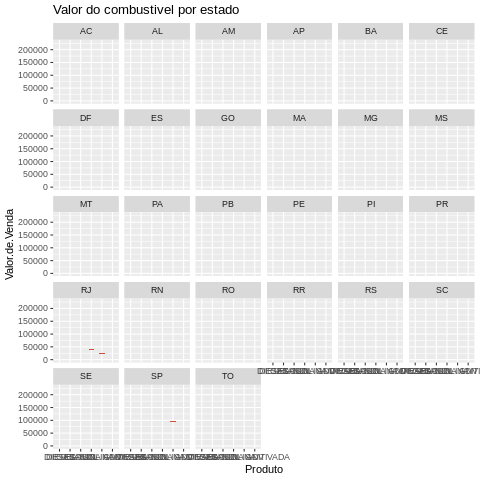

In [130]:
%%R
ggplot(p, aes(x= Produto, y = Valor.de.Venda)) + 
geom_bar(stat="identity", width=.5, fill="tomato3") + 
facet_wrap(~Estado...Sigla) +
ggtitle("Valor do combustivel por estado")

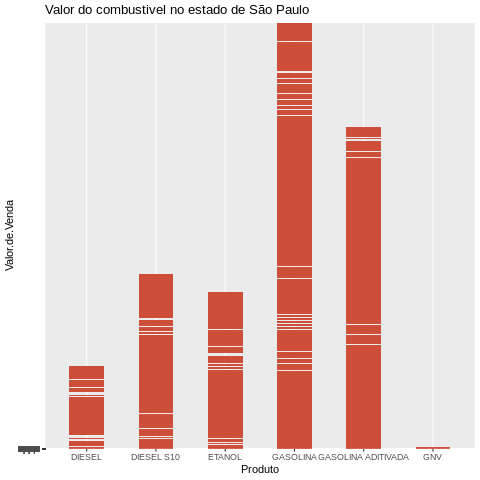

In [ ]:
%%R
ggplot(sao_paulo, aes(x= Produto, y = Valor.de.Venda)) + 
geom_bar(stat="identity", width=0.50, fill="tomato3") + 
ggtitle("Valor do combustivel no estado de São Paulo")